# importation du tableau de donnée

In [1]:
%matplotlib inline
import seaborn as sns
import pandas
import pandas as pd
import csv
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score


In [2]:
df=pd.read_csv('insertion_professionnelle.csv',sep=";")
df1=df [(df.annee == 2013) & (df.academie =="Paris") | (df.academie =="Créteil") | (df.academie =="Versailles")]

In [3]:
#df=pd.read_csv('insertion_professionnelle.csv',sep=";")
#df1=df [(df.annee == 2013) & (df.academie =="Paris")]

In [170]:
df1.head()

,annee,diplome,numero_de_l_etablissement,etablissement,code_de_l_academie,academie,code_du_domaine,domaine,code_de_la_discipline,discipline,...,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,cle_etab,cle_disc
189,2012,MASTER LMD,0772502B,Paris-Est Marne-la-Vallée,A24,Créteil,DEG,"Droit, économie et gestion",disc05,"Autres formations juridiques, économiques et d...",...,12.0,9,2020,ns,ns,ns,1580,2530,Paris-Est Marne-la-Vallée_30,disc05_30
190,2012,MASTER LMD,0772502B,Paris-Est Marne-la-Vallée,A24,Créteil,SHS,Sciences humaines et sociales,disc11,Autres sciences humaines et sociales,...,12.0,9,2020,76,22,55,1580,2530,Paris-Est Marne-la-Vallée_30,disc11_30
191,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc01,"Ensemble formations juridiques, économiques et...",...,11.0,9,2020,61,21,69,1580,2530,Versailles Saint-Quentin-en-Yvelines_30,disc01_30
192,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc02,Droit,...,11.0,9,2020,72,29,78,1580,2530,Versailles Saint-Quentin-en-Yvelines_18,disc02_18
193,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc03,Économie,...,11.0,9,2020,57,26,56,1580,2530,Versailles Saint-Quentin-en-Yvelines_30,disc03_30


In [4]:
#La commande .info() permet d'afficher la nature de nos données (catagorielle ou continue)
# Object signifie string, donc par forcément catégorielle.
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 189 to 5998
Data columns (total 31 columns):
annee                                            976 non-null int64
diplome                                          976 non-null object
numero_de_l_etablissement                        976 non-null object
etablissement                                    976 non-null object
code_de_l_academie                               976 non-null object
academie                                         976 non-null object
code_du_domaine                                  976 non-null object
domaine                                          976 non-null object
code_de_la_discipline                            976 non-null object
discipline                                       976 non-null object
situation                                        976 non-null object
remarque                                         150 non-null object
nombre_de_reponses                               972 non-null flo

In [32]:
# extraction de donnée de 2013 de la villde de paris
df12=df1.copy()
df12.index=np.array(df12.etablissement +" "+ df12.code_du_domaine+" "+df12.situation)
df12.drop(['etablissement','code_du_domaine', 'discipline', 'situation','annee','diplome','numero_de_l_etablissement',
          'code_de_l_academie','academie','domaine','code_de_la_discipline',
          'remarque','poids_de_la_discipline','cle_etab',
          'cle_disc'],axis=1,inplace=True)
#on suprime les ligne ayant des NaN
#df12=df12.dropna(how = 'any')
#df12=df12.fillna(df12.median())


In [171]:
df12.head()

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme,12.0,81.0,ns,ns,ns,ns,ns,NaN,12.0,9,2020,ns,ns,ns,1580,2530
Paris-Est Marne-la-Vallée SHS 30 mois après le diplôme,88.0,78.0,91,94,55,99,2040,31700.0,12.0,9,2020,76,22,55,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,271.0,60.0,89,87,71,98,2000,31200.0,11.0,9,2020,61,21,69,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 18 mois après le diplôme,57.0,62.0,91,85,47,92,2010,31300.0,11.0,9,2020,72,29,78,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,61.0,67.0,85,90,63,96,1860,29000.0,11.0,9,2020,57,26,56,1580,2530


# netoyage des données: remplacement des ns par 25 (Admis)

In [34]:
""" Netoyage et transformation de la base de donnée"""

def is_number(s):
    try:
        t=float(s)
        return t
    except ValueError:
        return 0

def net_donnee(A):
    for i in A.columns:
        j1=np.array(A[i])
        for k in range(len(j1)):
            if 'ns'==j1[k] :
                A[i][k]=25 #  un taux d'insertion < à 30 on le fixe à 25
            elif 'nd'==j1[k]:
                A[i][k]=0  # nd non repondant 
    return A

tab = net_donnee(df12)
#tab = tab.fillna(tab.median())


C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
for k in tab.columns:
    if k not in ['nombre_de_reponses','taux_de_reponse','salaire_brut_annuel_estime' ]:
        tab[k]=tab[k].astype("float64")

In [36]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme to Cergy-Pontoise STS 30 mois après le diplôme
Data columns (total 16 columns):
nombre_de_reponses                               972 non-null float64
taux_de_reponse                                  938 non-null float64
taux_dinsertion                                  960 non-null float64
emplois_cadre_ou_professions_intermediaires      960 non-null float64
emplois_stables                                  960 non-null float64
emplois_a_temps_plein                            960 non-null float64
salaire_net_median_des_emplois_a_temps_plein     960 non-null float64
salaire_brut_annuel_estime                       340 non-null float64
de_diplomes_boursiers                            950 non-null float64
taux_de_chomage_regional                         976 non-null float64
salaire_net_mensuel_median_regional              976 non-null float64
emplois_cadre                        

In [46]:
# extraction de donnée de 2013 de la villde de paris
df12=df1.copy()
df12.index=np.array(df12.etablissement +" "+ df12.code_du_domaine+" "+df12.situation)
df12.drop(['etablissement','code_du_domaine', 'discipline', 'situation','annee','diplome','numero_de_l_etablissement',
          'code_de_l_academie','academie','domaine','code_de_la_discipline',
          'remarque','poids_de_la_discipline','cle_etab',
          'cle_disc'],axis=1,inplace=True)


In [47]:
# Regardons les NA
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print(missing_data[(percent>0)],'\n')
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



# imputation des valeurs manquante

In [173]:
tab.head(n=3)

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme,12.0,81.0,25.0,25.0,25.0,25.0,25.0,31200.0,12.0,9.0,2020.0,25.0,25.0,25.0,1580.0,2530.0
Paris-Est Marne-la-Vallée SHS 30 mois après le diplôme,88.0,78.0,91.0,94.0,55.0,99.0,2040.0,31700.0,12.0,9.0,2020.0,76.0,22.0,55.0,1580.0,2530.0
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,271.0,60.0,89.0,87.0,71.0,98.0,2000.0,31200.0,11.0,9.0,2020.0,61.0,21.0,69.0,1580.0,2530.0


In [49]:
l=['salaire_brut_annuel_estime','salaire_net_mensuel_regional_3eme_quartile','salaire_net_mensuel_regional_1er_quartile',
  'taux_de_reponse','de_diplomes_boursiers','emplois_exterieurs_a_la_region_de_luniversite','femme','emploi_cadre',
  'salaire_net_median_des_emplois_a_temps_plein','emplois_satble','emplois_cadre_ou_professions_intermediares',
  'taux_dinsertion','nombre_de_reponse']
tab=tab.fillna(tab.median())
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



# matrice de correlation de la basse de donnee

In [28]:
#coefficirnt de correlation de varoable
tab.ix[:,].corr().round(2)

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
nombre_de_reponses,1.00,0.08,0.59,0.65,0.60,0.66,0.71,0.06,0.00,0.05,0.50,-0.13,0.41,0.03,0.04
taux_de_reponse,0.08,1.00,0.08,0.07,0.06,0.07,0.09,-0.04,0.05,0.02,0.04,0.08,0.04,-0.06,-0.05
taux_dinsertion,0.59,0.08,1.00,0.85,0.84,0.86,0.70,0.02,-0.01,0.07,0.63,-0.11,0.60,0.06,0.06
emplois_cadre_ou_professions_intermediaires,0.65,0.07,0.85,1.00,0.91,0.95,0.82,0.09,0.00,0.02,0.76,-0.12,0.49,0.02,0.03
emplois_stables,0.60,0.06,0.84,0.91,1.00,0.92,0.76,0.17,-0.03,-0.02,0.69,-0.19,0.43,0.03,0.04
emplois_a_temps_plein,0.66,0.07,0.86,0.95,0.92,1.00,0.83,0.07,0.01,-0.00,0.69,-0.17,0.51,0.00,0.02
salaire_net_median_des_emplois_a_temps_plein,0.71,0.09,0.70,0.82,0.76,0.83,1.00,0.15,0.03,0.04,0.61,-0.16,0.40,0.01,0.02
salaire_brut_annuel_estime,0.06,-0.04,0.02,0.09,0.17,0.07,0.15,1.00,-0.06,-0.03,0.13,-0.06,-0.25,0.05,0.04
taux_de_chomage_regional,0.00,0.05,-0.01,0.00,-0.03,0.01,0.03,-0.06,1.00,0.10,0.03,0.05,0.04,-0.81,-0.67
salaire_net_mensuel_median_regional,0.05,0.02,0.07,0.02,-0.02,-0.00,0.04,-0.03,0.10,1.00,0.26,0.36,0.28,0.33,0.39


# creation de la classe ACP

In [168]:

class projet:
    def __init__(self,df):
        """construiction du modèle avec les variable explicative et quantitative"""
        self._df=df
        #self._matrice_cov=matrice_cov

    def matrice_cov(self):#matrice de covariance
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_   
        return comp_princ
    
    def df(self):#la jeu de données
        #accesseur pour le model
        return self._df
    
    def matrice_covariance(self):#matrice de covariance
        #accesseur pour la matrice de cova
        return self._matrice_cov
    
    
    #Diagramme boîte des premières composantes principales.
    #en param on donne la matrice de covarience
    def repr_vp(self):#representation de valeurs propres
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_  
        plt.bar(numpy.arange(len( comp_princ))+0.5,  comp_princ)
        plt.title("Variance expliquée")
        
    #Diagramme boîte des premières composantes principales.
    #en param on donne le modèle (dataframe)
    
    def myPCA(self):#utilisation de l acp sur le jeu de données
        # Normalize data
        df0 = self._df
        df_norm = (df0 - df0.mean()) / df0.std()
        # PCA
        pca = PCA()
        pca_res = pca.fit_transform(df_norm.values)
        # Ebouli
        ebouli = pd.Series(pca.explained_variance_ratio_)
        coef = np.transpose(pca.components_)
        cols = ['PC-'+str(x) for x in range(len(ebouli))]
        pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
        return pc_infos, ebouli  

    def circleOfCorrelations(pc_infos, ebouli):#cercle de correlation
        plt.Circle((0,0),radius=10, color='g', fill=False)
        circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        for idx in range(len(pc_infos["PC-0"])):
            x = pc_infos["PC-0"][idx]
            y = pc_infos["PC-1"][idx]
            plt.plot([0.0,x],[0.0,y],'k-')
            plt.plot(x, y, 'rx')
            plt.annotate(pc_infos.index[idx], xy=(x,y))
        plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
        plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
        plt.xlim((-1,1))
        plt.ylim((-1,1))
        plt.title("Circle of Correlations")
    
    def boit_npre_comp(self):#reprentation des valeurs propre en diagrame en baton
        pca = PCA()
        c=pca.fit(self._df).transform(self._df)
        plt.boxplot(c[:,0:20])
        
#On affiche les fac dans le plan des deux premiers axes :
#en param on lui donne le modèle (datafram)            

    def repr_obs_plan(self):#representation des individu
       X_reduced = pca.transform(self._df)
       plt.figure(figsize=(18,6))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
       for label, x, y in zip(self._df.index, X_reduced[:, 0],  X_reduced[:, 1]):
          plt.annotate(label,xy = (x, y), xytext = (-10, 10),
          textcoords = 'offset points', ha = 'right', va = 'bottom',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
def repr_obs_plan(l):#representation des individu
       X_reduced = pca.transform(l)
       plt.figure(figsize=(20,6))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
       for label, x, y in zip(l.index, X_reduced[:, 0],  X_reduced[:, 1]):
          plt.annotate(label,xy = (x, y), xytext = (-10, 10),
          textcoords = 'offset points', ha = 'right', va = 'bottom',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.7),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

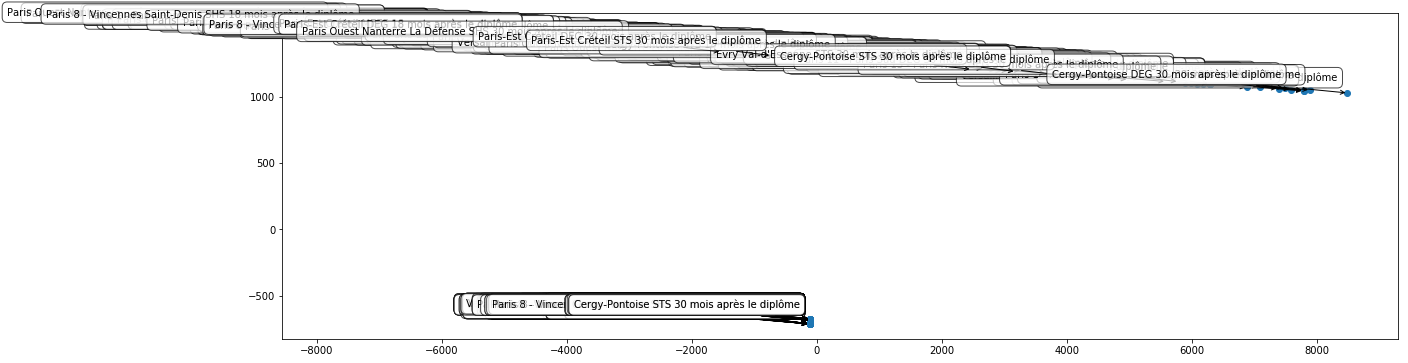

In [169]:
pca.transform(tab)
repr_obs_plan(tab)

In [52]:
p1= projet(tab)
#p1.repr_obs_plan()
#p1.boit_npre_comp()

# visualisation de quelles variables de la base de donnees

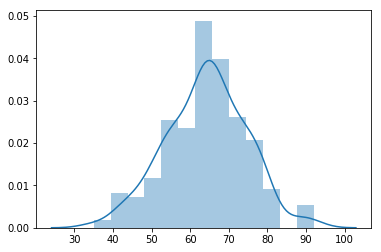

In [204]:
sns.distplot(np.array(tab['taux_de_reponse']))
plt.figure()

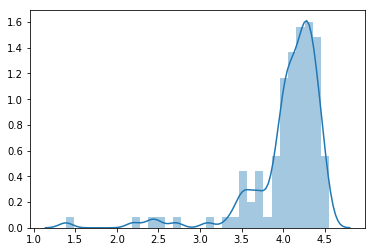

In [207]:
sns.distplot(np.log(np.array(tab['femmes'])))
plt.figure()

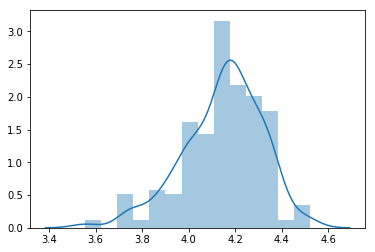

In [211]:
sns.distplot(np.log(np.array(tab['taux_de_reponse'])))
plt.figure()

# decomposition du jeux de données en train et test

In [53]:
y=tab["taux_dinsertion"]
X_train, X_test, y_train, y_test = train_test_split(tab, y, test_size=0.30, random_state=42)
del X_train["taux_dinsertion"]
del X_test["taux_dinsertion"]

In [54]:
# description du jeu de données X_train
print(X_train.describe())


       nombre_de_reponses  taux_de_reponse  \
count          683.000000       683.000000   
mean            52.884334        62.572474   
std             63.574925        14.297999   
min              0.000000         0.000000   
25%             12.500000        54.000000   
50%             31.000000        63.000000   
75%             73.000000        71.000000   
max            531.000000       100.000000   

       emplois_cadre_ou_professions_intermediaires  emplois_stables  \
count                                   683.000000       683.000000   
mean                                     52.114202        46.051245   
std                                      32.782968        26.798893   
min                                       0.000000         0.000000   
25%                                      25.000000        25.000000   
50%                                      25.000000        25.000000   
75%                                      88.000000        73.000000   
max              

# visualisation de données sur le train

Axes(0.125,0.125;0.62x0.755)


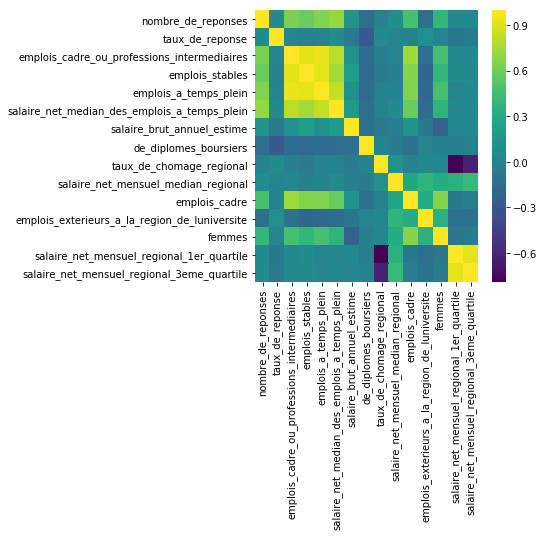

In [55]:
mat_corr=X_train.copy()
plt.figure(figsize=(5,5))
corr = mat_corr.corr()
print(sns.heatmap(corr,cmap='viridis'))

In [56]:
X_train.columns

Index(['nombre_de_reponses', 'taux_de_reponse',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile'],
      dtype='object')

-histogramme de quelles que variables

(array([  80.,  163.,  276.,  132.,   30.,    0.,    0.,    0.,    0.,    2.]),
 array([  7.,  13.,  19.,  25.,  31.,  37.,  43.,  49.,  55.,  61.,  67.]),
 <a list of 10 Patch objects>)

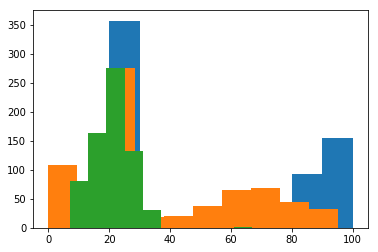

In [62]:
plt.hist(np.array(X_train['emplois_cadre_ou_professions_intermediaires']))
plt.hist(np.array(X_train['femmes']))
plt.hist(np.array(X_train['de_diplomes_boursiers']))

(array([   2.,    0.,    0.,    0.,    0.,    0.,    0.,  182.,    0.,  499.]),
 array([ 1430.,  1450.,  1470.,  1490.,  1510.,  1530.,  1550.,  1570.,
         1590.,  1610.,  1630.]),
 <a list of 10 Patch objects>)

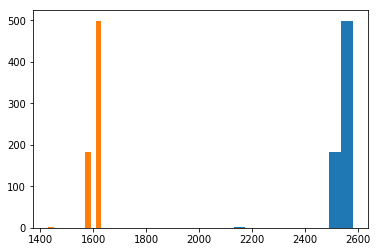

In [63]:
plt.hist(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
plt.hist(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))

-detection de correlation entre les variable
 #si le coefficient de correlation proche de 1 donc les deux variables sont tres correlees

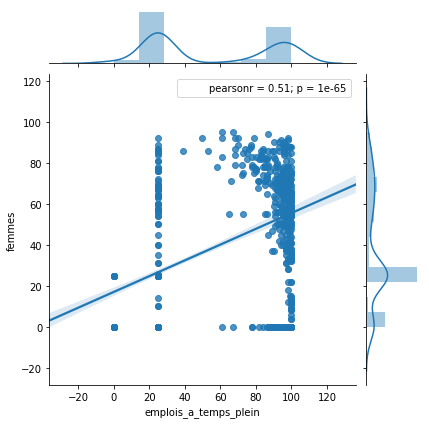

In [69]:
sns.jointplot("emplois_a_temps_plein", "femmes", data=tab,kind="reg")

-supperposition de la densite de la variable avec l histogramme

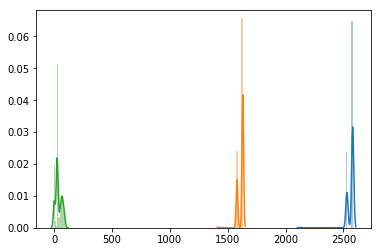

In [72]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
sns.distplot(np.array(X_train['femmes']))
plt.figure()

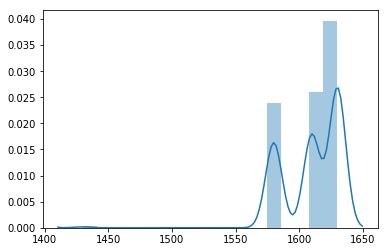

In [61]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
plt.figure()

# creation d un modele de machine learning pour pouvoir predire le taux_dinsertion

In [74]:
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
#print(clf.feature_importances_)
selec = clf.feature_importances_
var_select = [X_train.columns[k] for k in range(len(selec)) if selec[k] !=0]
#selec[0]   
#X_train.columns[0]
X_train_selecte = X_train[var_select]
X_test_selecte = X_test[var_select]
clf.fit(X_train_selecte,y_train)
pred = clf.predict(X_test_selecte)

#print(len(pred.values))
print(explained_variance_score(y_test,pred))

#print(len(pred),len(y_test)) 
"""mat_corr_select=X_train_selecte.copy()
plt.figure(figsize=(5,5))
corr_select = mat_corr_select.corr()
print(sns.heatmap(corr_select,cmap='viridis')) 0.92720416802"""

0.919014402727


"mat_corr_select=X_train_selecte.copy()\nplt.figure(figsize=(5,5))\ncorr_select = mat_corr_select.corr()\nprint(sns.heatmap(corr_select,cmap='viridis')) 0.92720416802"

# PCA skelearn

# Application des methodes de la classe projet

In [93]:
# creation d une instance de la classe projet
t=projet(tab)
#t.myPCA()
#t.repr_vp()
t.matrice_cov()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([  8.40854968e-01,   1.57782440e-01,   3.97985092e-04,
         3.27350291e-04,   2.52216517e-04,   1.83318285e-04,
         5.77687710e-05,   4.53849126e-05,   3.78319321e-05,
         1.92808518e-05,   1.16322085e-05,   9.30961058e-06,
         7.91822714e-06,   6.94325663e-06,   5.65164597e-06,
         1.46222271e-10])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


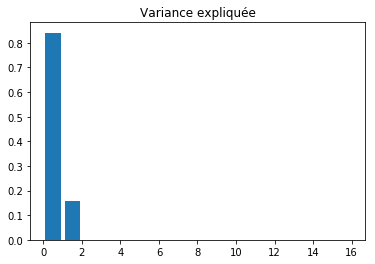

In [94]:
# representation des composantes principales
t.repr_vp()

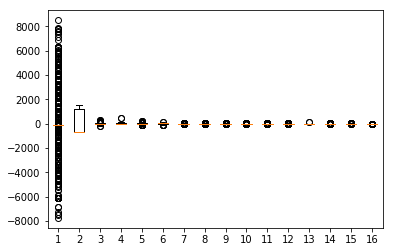

In [95]:
# boxplot des composante principale        
t.boit_npre_comp()

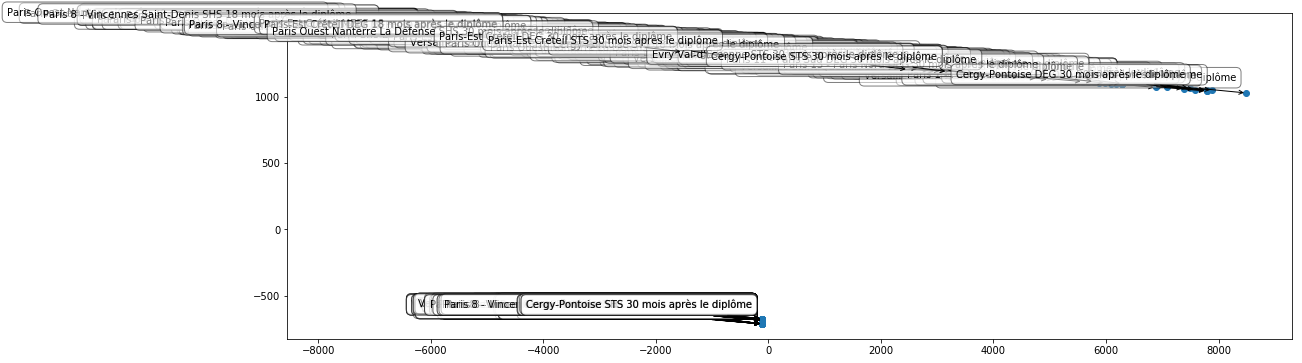

In [127]:
# representation des individu
t.repr_obs_plan()

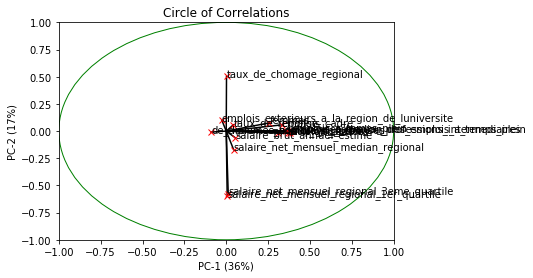

In [98]:
# cercle de correlation
t1,t2 = t.myPCA()
circleOfCorrelations(t1,t2)